In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
df_consultas = pd.read_csv('consultas_final.csv', sep = ',')
df_avaliacoes = pd.read_csv('avaliacoes_final.csv', sep = ',')
df_clinicas = pd.read_csv('clinicas_final.csv', sep = ',')
df_medicos = pd.read_csv('medicos.csv', sep = ',')
df_pacientes = pd.read_csv('pacientes_final.csv', sep = ',')

In [4]:
df_consultas.head()

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status
0,1,82,15,4,Cardiologia,2023-09-27 23:46,2023-09-28 00:16,Realizada
1,2,18,95,14,Cardiologia,2023-09-04 09:05,2023-09-04 13:05,Realizada
2,3,55,5,4,Pediatria,2023-02-04 02:43,2023-02-04 02:58,Realizada
3,4,78,4,72,Ortopedia,2023-03-14 09:28,2023-03-14 13:28,Realizada
4,5,58,76,36,Pediatria,2023-10-22 16:54,2023-10-22 16:54,Cancelada


In [5]:
# conversão das datas e horas para poder realizar calculos 
df_consultas['data_hora_agendada'] = pd.to_datetime(df_consultas['data_hora_agendada'])
df_consultas['data_hora_inicio'] = pd.to_datetime(df_consultas['data_hora_inicio'])
# formula para extração dos valores de tempo e alocando para uma nova coluna
df_consultas['tempo_espera'] = (df_consultas['data_hora_inicio'] - df_consultas['data_hora_agendada']).dt.total_seconds() / 60 

In [6]:
df_consultas.to_csv('consultas_final2.csv', sep = ';', index = False)

In [7]:
def tendencia_central (a):
        # Calculo das medidas de tendencias centrais            
    media_consulta = np.mean(a)
    mediana_consulta= np.median(a)
    distancia_consulta = ((media_consulta - mediana_consulta)/mediana_consulta)*100
    print(f"Média: {media_consulta:.2f}\nMediana: {mediana_consulta:.2f}\nDistancia: {distancia_consulta:.2f}% ")
    return media_consulta, mediana_consulta, distancia_consulta

def outliers (b):
        # determinando os quartis
    q1, q2, q3= np.percentile(b , [25, 50, 75])
    iqr = q3 - q1
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)
    outlier_lista = [x for x in b if x < limite_inferior or x > limite_superior]           
    print(f"Quartis\nQ1: {q1:.2f}\nQ2: {q2:.2f}\nQ3: {q3:.2f}\nValores de corte:\nLimite superior: {limite_superior:.2f}\nLimite inferior: {limite_inferior:.2f}")
    return outlier_lista, limite_inferior, limite_superior, q1, q3

In [8]:
# mesclando os df para os comparativos
# consultas x clinicas 
df_consultas_clinicas = pd.merge(df_consultas, df_clinicas, on='id_clinica', how='inner').reset_index()

In [9]:
# consultas x medicos
df_consultas_medicos = pd.merge(df_consultas, df_medicos, on='id_medico', how='inner').reset_index()

In [10]:
# clinica x avaliação
df_clinica_avaliacao = pd.merge(df_consultas_clinicas, df_avaliacoes, on='id_consulta', how='inner')

In [11]:
# consulta x paciente x clinica
df_pacientes_avaliacao = pd.merge(df_clinica_avaliacao, df_pacientes, on='id_paciente', how='inner')

In [12]:
# consultas x medicos x avaliacao
df_medicos_avaliacao = pd.merge(df_consultas_medicos, df_avaliacoes, on='id_consulta', how='inner').reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

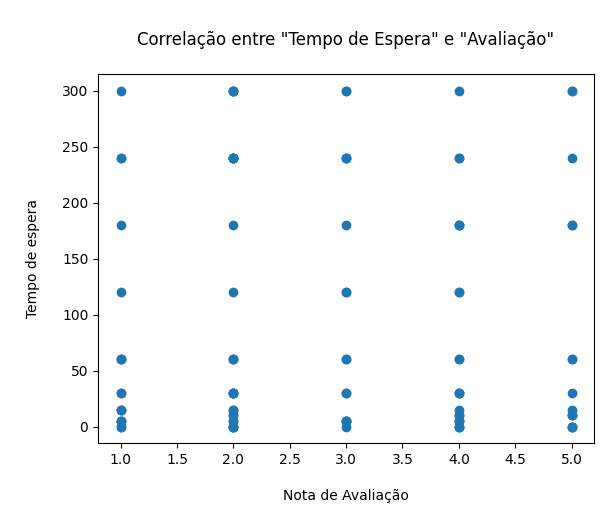

In [13]:
# correlação entre avaliação e tempo de espera

plt.scatter(df_clinica_avaliacao['nota_satisfacao'], df_clinica_avaliacao['tempo_espera'])
plt.title('\nCorrelação entre "Tempo de Espera" e "Avaliação"\n')
plt.xlabel('\nNota de Avaliação\n')
plt.ylabel('\nTempo de espera\n')
plt.show

In [14]:
# formula para analisar as as tendencias centrais e outliers de todos as linhas da coluna mencionada e adicionando a um df para melhor visualização
# formula pratica para analise direta

Analise_clinica = {'clinica': [],'media': [],'mediana': [],'distancia_percentual': [],'limite_inferior': [],'limite_superior': [], 'q1': [],'q3': []}

for nome_clinica, grupo in df_consultas_clinicas.groupby('nome'):
    print(f"\nNome: {nome_clinica}")
    tempo_espera = grupo['tempo_espera'].values
    media_consulta, mediana_consulta, distancia_consulta = tendencia_central(grupo['tempo_espera'])
    outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers(tempo_espera)  
    Analise_clinica['clinica'].append(nome_clinica)
    Analise_clinica['media'].append(media_consulta)    
    Analise_clinica['mediana'].append(mediana_consulta)
    Analise_clinica['distancia_percentual'].append(distancia_consulta)        
    Analise_clinica['limite_inferior'].append(limite_inferior)
    Analise_clinica['limite_superior'].append(limite_superior)
    Analise_clinica['q1'].append(q1)
    Analise_clinica['q3'].append(q3)

df_analise_clinica = pd.DataFrame(Analise_clinica)


Nome: Bem Viver
Média: 93.15
Mediana: 60.00
Distancia: 55.25% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Clínica Bem Estar
Média: 94.21
Mediana: 30.00
Distancia: 214.04% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Clínica Esperança
Média: 91.95
Mediana: 30.00
Distancia: 206.51% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Clínica Horizonte
Média: 103.16
Mediana: 60.00
Distancia: 71.93% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Clínica Nova Vida
Média: 98.37
Mediana: 60.00
Distancia: 63.94% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Clínica Renova
Média: 94.03
Mediana: 30.00
Distancia: 213.42% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valore

In [15]:
Analise_especialidade = {'especialidade': [],'media': [],'mediana': [],'distancia_percentual': [],'limite_inferior': [],'limite_superior': [], 'q1': [],'q3': []}

for nome_especialidade, grupo in df_consultas.groupby('especialidade'):
    print(f"\nEspecialidade: {nome_especialidade}")
    tempo_espera = grupo['tempo_espera'].values
    media_consulta, mediana_consulta, distancia_consulta = tendencia_central(grupo['tempo_espera'])
    outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers(tempo_espera)  
    Analise_especialidade['especialidade'].append(nome_especialidade)
    Analise_especialidade['media'].append(media_consulta)    
    Analise_especialidade['mediana'].append(mediana_consulta)
    Analise_especialidade['distancia_percentual'].append(distancia_consulta)        
    Analise_especialidade['limite_inferior'].append(limite_inferior)
    Analise_especialidade['limite_superior'].append(limite_superior)
    Analise_especialidade['q1'].append(q1)
    Analise_especialidade['q3'].append(q3)

df_analise_especialidade = pd.DataFrame(Analise_especialidade)


Especialidade: Cardiologia
Média: 96.15
Mediana: 60.00
Distancia: 60.25% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Especialidade: Dermatologia
Média: 97.58
Mediana: 60.00
Distancia: 62.64% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Especialidade: Ginecologia
Média: 95.84
Mediana: 30.00
Distancia: 219.47% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Especialidade: Neurologia
Média: 100.52
Mediana: 60.00
Distancia: 67.54% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Especialidade: Ortopedia
Média: 94.04
Mediana: 30.00
Distancia: 213.46% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Especialidade: Pediatria
Média: 93.01
Mediana: 30.00
Distancia: 210.05% 
Quartis
Q1: 10.00
Q2

In [31]:

Analise_medico = {'medico': [],'media': [],'mediana': [],'distancia_percentual': [],'limite_inferior': [],'limite_superior': [], 'q1': [],'q3': []}

for nome_medico, grupo in df_consultas_medicos.groupby('nome'):
    print(f"\nNome: {nome_medico}")
    tempo_espera = grupo['tempo_espera'].values
    media_consulta, mediana_consulta, distancia_consulta = tendencia_central(grupo['tempo_espera'])
    outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers(tempo_espera)  
    Analise_medico['medico'].append(nome_medico)
    Analise_medico['media'].append(media_consulta)    
    Analise_medico['mediana'].append(mediana_consulta)
    Analise_medico['distancia_percentual'].append(distancia_consulta)        
    Analise_medico['limite_inferior'].append(limite_inferior)
    Analise_medico['limite_superior'].append(limite_superior)
    Analise_medico['q1'].append(q1)
    Analise_medico['q3'].append(q3)

df_analise_medico = pd.DataFrame(Analise_medico)
df_analise_medico


Nome: Dr(a). André Almeida
Média: 96.99
Mediana: 60.00
Distancia: 61.65% 
Quartis
Q1: 15.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 427.50
Limite inferior: -232.50

Nome: Dr(a). André Gomes
Média: 94.38
Mediana: 30.00
Distancia: 214.60% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Dr(a). André Lima
Média: 98.58
Mediana: 30.00
Distancia: 228.61% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Dr(a). André Nascimento
Média: 93.07
Mediana: 45.00
Distancia: 106.82% 
Quartis
Q1: 10.00
Q2: 45.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Dr(a). André Oliveira
Média: 97.41
Mediana: 30.00
Distancia: 224.70% 
Quartis
Q1: 6.25
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 440.62
Limite inferior: -254.38

Nome: Dr(a). André Pereira
Média: 106.75
Mediana: 45.00
Distancia: 137.22% 
Quartis
Q1: 13.7

,medico,media,mediana,distancia_percentual,limite_inferior,limite_superior,q1,q3
0,Dr(a). André Almeida,96.992754,60.0,61.654589,-232.500,427.500,15.00,180.0
1,Dr(a). André Gomes,94.381443,30.0,214.604811,-245.000,435.000,10.00,180.0
2,Dr(a). André Lima,98.583333,30.0,228.611111,-245.000,435.000,10.00,180.0
3,Dr(a). André Nascimento,93.068182,45.0,106.818182,-245.000,435.000,10.00,180.0
4,Dr(a). André Oliveira,97.409639,30.0,224.698795,-254.375,440.625,6.25,180.0
5,Dr(a). André Pereira,106.750000,45.0,137.222222,-235.625,429.375,13.75,180.0
6,Dr(a). André Souza,104.250000,60.0,73.750000,-335.000,585.000,10.00,240.0
7,Dr(a). Camila Almeida,96.755319,30.0,222.517730,-245.000,435.000,10.00,180.0
8,Dr(a). Camila Costa,89.178571,30.0,197.261905,-245.000,435.000,10.00,180.0
9,Dr(a). Camila Gomes,109.907407,45.0,144.238683,-335.000,585.000,10.00,240.0


In [32]:
df_analise_medico.to_csv('Analise atendimento medicos.csv', sep = ';')

### ANALISES NOVOS PROBLEMAS ###

In [17]:
df_pacientes_avaliacao

,index,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera,nome,cidade_x,capacidade_diaria,nota_satisfacao,comentario,idade,sexo,cidade_y,plano_saude
0,8,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,240.0,Saúde Total,Manaus,20,4,Comentário 3,14,M,Porto Alegre,Sim
1,15,16,82,89,72,Ortopedia,2023-03-21 23:01:00,2023-03-22 00:01:00,Cancelada,60.0,Bem Viver,Brasília,74,1,Comentário 83,21,M,Salvador,Não
2,33,34,11,94,63,Pediatria,2023-10-25 02:31:00,2023-10-25 02:36:00,Remarcada,5.0,Clínica Horizonte,Brasília,28,1,Comentário 2,12,F,Manaus,Sim
3,79,80,90,14,49,Dermatologia,2023-11-14 13:06:00,2023-11-14 13:06:00,Cancelada,0.0,Saúde Total,Manaus,20,1,Comentário 51,83,F,Curitiba,Não
4,84,85,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0.0,Clínica Vital,Curitiba,35,1,Comentário 97,65,F,Fortaleza,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4742,4743,79,71,42,Neurologia,2023-02-09 14:03:00,2023-02-09 19:03:00,Realizada,300.0,Vida Plena,Rio de Janeiro,37,5,Comentário 14,47,F,Porto Alegre,Não
96,4873,4874,52,88,93,Ortopedia,2023-06-11 05:05:00,2023-06-11 05:05:00,Realizada,0.0,Clínica Horizonte,Belo Horizonte,54,5,Comentário 29,38,F,Manaus,Sim
97,4879,4880,99,27,99,Pediatria,2023-10-20 19:55:00,2023-10-20 20:10:00,Realizada,15.0,Bem Viver,Salvador,71,2,Comentário 96,28,M,Rio de Janeiro,Não
98,4915,4916,85,19,39,Cardiologia,2023-03-01 02:15:00,2023-03-01 03:15:00,Realizada,60.0,Clínica São Lucas,Salvador,83,2,Comentário 44,64,F,São Paulo,Não


<function matplotlib.pyplot.show(close=None, block=None)>

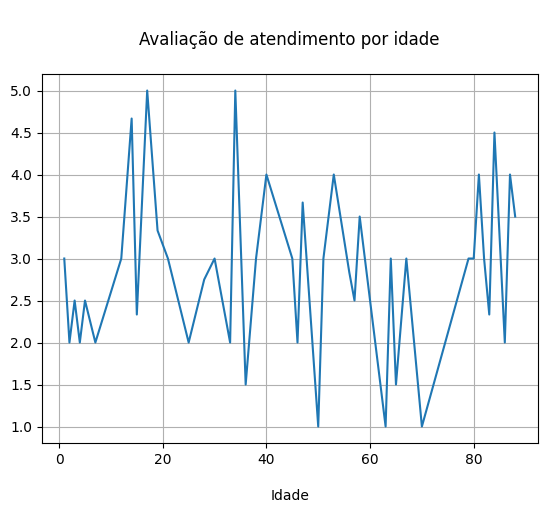

In [18]:
# formula para agrupar as medias das avaliações por idade
df_idade = df_pacientes_avaliacao.groupby('idade')['nota_satisfacao'].mean().reset_index()

#gráfico informando a media e avaliação de atendimento por idade
plt.plot(df_idade['idade'], df_idade['nota_satisfacao'])
plt.title('\nAvaliação de atendimento por idade\n')
plt.xlabel('\nIdade\n')
plt.grid(True)
plt.show

# Pacientes de determinadas cidades ou faixas etárias estão mais insatisfeitos com alguma especialidade?

In [19]:
idade_avaliacao = df_pacientes_avaliacao.groupby(['idade', 'especialidade'])['nota_satisfacao'].mean().reset_index()
idade_avaliacao.sort_values('nota_satisfacao')

,idade,especialidade,nota_satisfacao
0,1,Ginecologia,1.0
9,7,Ginecologia,1.0
24,25,Cardiologia,1.0
22,21,Ortopedia,1.0
48,50,Pediatria,1.0
...,...,...,...
40,38,Ortopedia,5.0
45,47,Neurologia,5.0
36,34,Ortopedia,5.0
13,14,Cardiologia,5.0


In [20]:
cidade_avaliacao = df_pacientes_avaliacao.groupby(['cidade_x', 'especialidade'])['nota_satisfacao'].mean().reset_index()
cidade_avaliacao.sort_values('nota_satisfacao')

,cidade_x,especialidade,nota_satisfacao
8,Curitiba,Cardiologia,1.000000
17,Manaus,Dermatologia,1.000000
42,São Paulo,Cardiologia,1.000000
39,Salvador,Neurologia,1.000000
35,Rio de Janeiro,Pediatria,1.666667
6,Brasília,Ortopedia,1.750000
28,Recife,Dermatologia,2.000000
14,Fortaleza,Neurologia,2.000000
44,São Paulo,Ortopedia,2.000000
21,Manaus,Pediatria,2.000000


# Médicos com menor tempo médio de atendimento estão concentrando mais reclamações?

In [21]:
# reset_index(name='quantidade_comentarios') transforma o resultado em um DataFrame e dá nome à nova coluna.
medicos_avaliacao = df_medicos_avaliacao.groupby(['nome', 'tempo_medio_atendimento'])['comentario'].size().reset_index(name = 'quantidade de reclamações')
medicos_avaliacao.sort_values('tempo_medio_atendimento')
medicos_avaliacao2 = df_medicos_avaliacao.groupby('tempo_medio_atendimento')['comentario'].size().reset_index(name = 'quantidade de reclamações')

<function matplotlib.pyplot.show(close=None, block=None)>

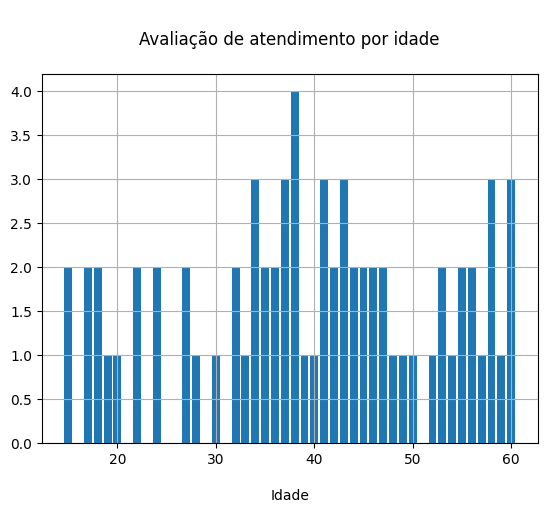

In [22]:
#gráfico informando a media e avaliação de atendimento por idade
plt.bar(medicos_avaliacao['tempo_medio_atendimento'], medicos_avaliacao['quantidade de reclamações'])
plt.title('\nAvaliação de atendimento por idade\n')
plt.xlabel('\nIdade\n')
plt.grid(True)
plt.show

Clínicas com maior capacidade estão realmente atendendo mais ou melhor?

In [23]:
# reset_index(name='quantidade_comentarios') transforma o resultado em um DataFrame e dá nome à nova coluna.
clinica_analise = df_consultas_clinicas.groupby(['nome', 'capacidade_diaria'])['id_paciente'].size().reset_index(name = 'atendimentos')

clinica_analise['atendimentos %'] = (clinica_analise['atendimentos'] /clinica_analise ['capacidade_diaria']) *100
clinica_analise.sort_values('capacidade_diaria', ascending= False).head()


,nome,capacidade_diaria,atendimentos,atendimentos %
81,Clínica Vital,100,60,60.000000
61,Clínica Renova,98,57,58.163265
68,Clínica São Lucas,98,35,35.714286
53,Clínica Nova Vida,97,44,45.360825
88,Saúde Total,97,59,60.824742


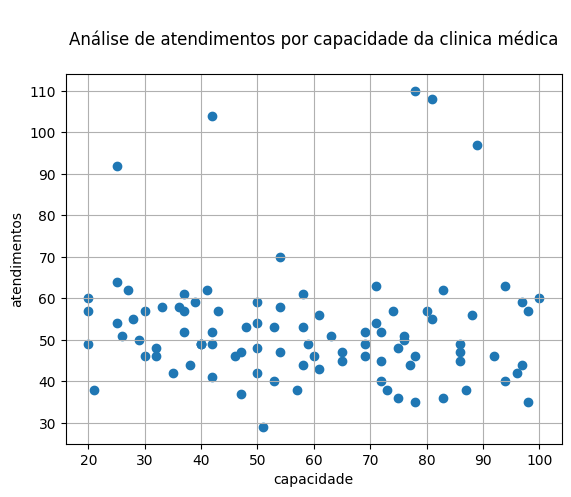

In [24]:
plt.scatter(clinica_analise['capacidade_diaria'], clinica_analise['atendimentos'])
plt.title('\nAnálise de atendimentos por capacidade da clinica médica\n')
plt.xlabel('capacidade')
plt.ylabel('atendimentos')
plt.grid(True)
plt.show()

In [25]:
clinica_analise2 = df_clinica_avaliacao.groupby(['nome', 'capacidade_diaria'])['nota_satisfacao'].mean().reset_index(name = 'nota_atendimentos')
clinica_analise2.sort_values('capacidade_diaria', ascending= False).head()

,nome,capacidade_diaria,nota_atendimentos
49,Clínica Vital,100,2.0
36,Clínica Renova,98,3.0
53,Saúde Total,97,2.5
30,Clínica Nova Vida,97,5.0
40,Clínica São Lucas,96,4.0


#Existe relação entre plano de saúde e tempo de espera?

In [26]:
espera_plano = df_pacientes_avaliacao.groupby('plano_saude')['tempo_espera'].mean().reset_index(name = 'media tempo de espera')
espera_plano.sort_values('media tempo de espera', ascending= False).head()

,plano_saude,media tempo de espera
1,Sim,100.9
0,Não,91.0


In [27]:
df_pacientes.groupby('plano_saude').size().reset_index()

,plano_saude,0
0,Não,55
1,Sim,45


Há especialidades com alta taxa de cancelamento e baixa nota de satisfação?

In [28]:
especialidade_analise = df_medicos_avaliacao.loc[df_medicos_avaliacao['status'] == 'Cancelada']
especialidade_analise = especialidade_analise.groupby(['especialidade_x', 'status']).agg( Quantidade_Cancelamento = ('status','size'), avaliacao_media = ('nota_satisfacao','mean')).reset_index()
especialidade_analise.sort_values(by = 'avaliacao_media')

,especialidade_x,status,Quantidade_Cancelamento,avaliacao_media
1,Dermatologia,Cancelada,2,1.000000
2,Ginecologia,Cancelada,2,2.500000
5,Pediatria,Cancelada,6,2.500000
0,Cardiologia,Cancelada,4,2.750000
3,Neurologia,Cancelada,2,3.000000
4,Ortopedia,Cancelada,3,3.333333


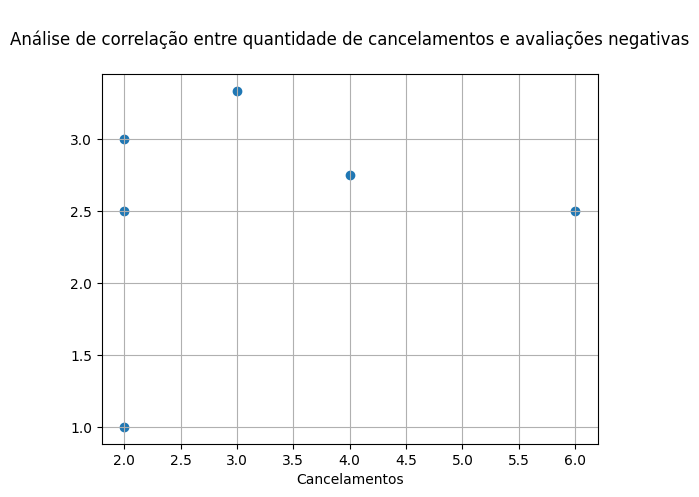

In [29]:
plt.scatter(especialidade_analise['Quantidade_Cancelamento'], especialidade_analise['avaliacao_media'])
plt.title('\nAnálise de correlação entre quantidade de cancelamentos e avaliações negativas\n')
plt.xlabel('Cancelamentos')
plt.grid(True)
plt.show()

In [30]:
df_medicos_avaliacao.head()

,level_0,index,id_consulta,id_paciente,id_medico,id_clinica,especialidade_x,data_hora_agendada,data_hora_inicio,status,tempo_espera,nome,especialidade_y,tempo_medio_atendimento,nota_satisfacao,comentario
0,0,8,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,240.0,Dr(a). Juliana Oliveira,Pediatria,19,4,Comentário 3
1,1,15,16,82,89,72,Ortopedia,2023-03-21 23:01:00,2023-03-22 00:01:00,Cancelada,60.0,Dr(a). Mariana Oliveira,Ginecologia,18,1,Comentário 83
2,2,33,34,11,94,63,Pediatria,2023-10-25 02:31:00,2023-10-25 02:36:00,Remarcada,5.0,Dr(a). Ricardo Almeida,Oftalmologia,58,1,Comentário 2
3,3,79,80,90,14,49,Dermatologia,2023-11-14 13:06:00,2023-11-14 13:06:00,Cancelada,0.0,Dr(a). André Souza,Endocrinologia,17,1,Comentário 51
4,4,84,85,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0.0,Dr(a). Patrícia Lima,Urologia,38,1,Comentário 97
